In [92]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
%matplotlib inline

In [93]:
sql_query1 = ('SELECT * FROM crashes '
              'WHERE "motorcycle count" > 0')
conn = sql.connect('crash-data.db')
mc_df = pd.read_sql_query(sql_query1, conn)
conn.close()

In [94]:
mc_df

,Crash Record Number,County Code,County Name,Municipality Code,Municipality Name,District Code,District Name,Police Agency Code,Police Agency Name,Crash Year,...,Suspected Serious Injury,Suspected Minor Injury,Possible Injury,Motorcycle Drinking Driver,Drug Related,Illegal Drug Related,School Bus Unit,Drugged Driver,Impaired Driver,Geographic Location of the Crash
0,2016000348,09,Bucks,09218,Northampton Twp,06,District 6-0,09218,NORTHAMPTON TWP,2016,...,No,No,No,No,No,No,No,No,No,"(40.1764, -74.984)"
1,2016000697,09,Bucks,09224,Upper Makefield Twp,06,District 6-0,09224,UPPER MAKEFIELD TWP,2016,...,No,Yes,No,No,No,No,No,No,No,"(40.3114, -74.9505)"
2,2016001188,36,Lancaster,36408,Ephrata Boro,08,District 8-0,36408,EPHRATA,2016,...,No,Yes,Yes,No,No,No,No,No,No,"(40.1648, -76.2006)"
3,2016001239,64,Westmoreland,64215,Sewickley Twp,12,District 12-0,68A01,PSP - Greensburg,2016,...,Yes,No,No,No,No,No,No,No,No,"(40.2376, -79.7743)"
4,2016001947,23,Delaware,23208,Newtown Twp,06,District 6-0,23208,NEWTOWN TWP,2016,...,No,No,No,No,No,No,No,No,No,"(39.9846, -75.3991)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71670,2017038531,49,Northumberland,49201,Delaware Twp,03,District 3-0,68F06,PSP - Milton,2017,...,Yes,No,No,No,No,No,No,No,No,"(41.1572, -76.8731)"
71671,2017072506,25,Erie,25213,Millcreek Twp,01,District 1-0,25213,MILLCREEK TWP,2017,...,No,Yes,No,No,No,No,No,No,No,"(42.0997, -80.1458)"
71672,2017022897,49,Northumberland,49409,Snydertown Boro,03,District 3-0,68F08,PSP - Stonington,2017,...,No,No,No,No,No,No,No,No,No,"(40.8816, -76.6665)"
71673,2017092445,62,Washington,62228,Union Twp,12,District 12-0,62301,MONONGAHELA CITY,2017,...,Yes,Yes,No,No,Yes,No,No,Yes,Yes,"(40.231, -79.9727)"


In [95]:
by_county1 = pd.DataFrame(mc_df.groupby('County Name')['Crash Record Number'].count()).reset_index(level=0)

In [96]:
by_county1.rename(columns={'County Name': 'CTYName', 'Crash Record Number': 'CrashCount'}, inplace=True)

In [97]:
by_county1

,CTYName,CrashCount
0,Adams,799
1,Allegheny,5663
2,Armstrong,387
3,Beaver,890
4,Bedford,449
...,...,...
62,Washington,1351
63,Wayne,417
64,Westmoreland,2420
65,Wyoming,214


In [98]:
by_county1['Crash%'] = by_county1['CrashCount'] / by_county1['CrashCount'].sum()

In [99]:
by_county1

,CTYName,CrashCount,Crash%
0,Adams,799,0.011148
1,Allegheny,5663,0.079009
2,Armstrong,387,0.005399
3,Beaver,890,0.012417
4,Bedford,449,0.006264
...,...,...,...
62,Washington,1351,0.018849
63,Wayne,417,0.005818
64,Westmoreland,2420,0.033764
65,Wyoming,214,0.002986


In [100]:
sql_query2 = ('SELECT CTYNAME, Pop FROM PA_County_Population ')
conn = sql.connect('crash-data.db')
pop_df = pd.read_sql_query(sql_query2, conn)
conn.close()

In [101]:
pop_df['CTYNAME'] = pop_df['CTYNAME'].apply(lambda x: x.split(' ')[0])

In [102]:
crashCTY = by_county1['CTYName'].tolist()
popCTY = pop_df['CTYNAME'].tolist()

In [103]:
crashCTY

['Adams',
 'Allegheny',
 'Armstrong',
 'Beaver',
 'Bedford',
 'Berks',
 'Blair',
 'Bradford',
 'Bucks',
 'Butler',
 'Cambria',
 'Cameron',
 'Carbon',
 'Centre',
 'Chester',
 'Clarion',
 'Clearfield',
 'Clinton',
 'Columbia',
 'Crawford',
 'Cumberland',
 'Dauphin',
 'Delaware',
 'Elk',
 'Erie',
 'Fayette',
 'Forest',
 'Franklin',
 'Fulton',
 'Greene',
 'Huntingdon',
 'Indiana',
 'Jefferson',
 'Juniata',
 'Lackawanna',
 'Lancaster',
 'Lawrence',
 'Lebanon',
 'Lehigh',
 'Luzerne',
 'Lycoming',
 'Mckean',
 'Mercer',
 'Mifflin',
 'Monroe',
 'Montgomery',
 'Montour',
 'Northampton',
 'Northumberland',
 'Perry',
 'Philadelphia',
 'Pike',
 'Potter',
 'Schuylkill',
 'Snyder',
 'Somerset',
 'Sullivan',
 'Susquehanna',
 'Tioga',
 'Union',
 'Venango',
 'Warren',
 'Washington',
 'Wayne',
 'Westmoreland',
 'Wyoming',
 'York']

In [104]:
popCTY

['Philadelphia',
 'Allegheny',
 'Montgomery',
 'Bucks',
 'Delaware',
 'Lancaster',
 'Chester',
 'York',
 'Berks',
 'Lehigh',
 'Westmoreland',
 'Luzerne',
 'Northampton',
 'Dauphin',
 'Erie',
 'Cumberland',
 'Lackawanna',
 'Washington',
 'Butler',
 'Monroe',
 'Beaver',
 'Centre',
 'Franklin',
 'Schuylkill',
 'Lebanon',
 'Cambria',
 'Fayette',
 'Blair',
 'Lycoming',
 'Mercer',
 'Adams',
 'Northumberland',
 'Lawrence',
 'Crawford',
 'Indiana',
 'Clearfield',
 'Somerset',
 'Columbia',
 'Armstrong',
 'Carbon',
 'Bradford',
 'Pike',
 'Wayne',
 'Venango',
 'Bedford',
 'Mifflin',
 'Perry',
 'Huntingdon',
 'Union',
 'Jefferson',
 'McKean',
 'Tioga',
 'Susquehanna',
 'Snyder',
 'Warren',
 'Clarion',
 'Clinton',
 'Greene',
 'Elk',
 'Wyoming',
 'Juniata',
 'Montour',
 'Potter',
 'Fulton',
 'Forest',
 'Sullivan',
 'Cameron']

In [105]:
by_county1.replace({'Mckean': 'McKean'}, inplace=True)

In [106]:
pop_df

,CTYNAME,Pop
0,Philadelphia,1584138
1,Allegheny,1218452
2,Montgomery,828604
3,Bucks,628195
4,Delaware,564751
...,...,...
62,Potter,16622
63,Fulton,14523
64,Forest,7279
65,Sullivan,6071


In [107]:
pop_df['Pop'] = pop_df['Pop'].astype(int)
pop_df['Pop%'] = pop_df['Pop'] / pop_df['Pop'].sum()

In [108]:
pop_df.rename(columns={'CTYNAME': 'CTYName'}, inplace=True)
print(by_county1)
print(pop_df)

         CTYName  CrashCount    Crash%
0          Adams         799  0.011148
1      Allegheny        5663  0.079009
2      Armstrong         387  0.005399
3         Beaver         890  0.012417
4        Bedford         449  0.006264
..           ...         ...       ...
62    Washington        1351  0.018849
63         Wayne         417  0.005818
64  Westmoreland        2420  0.033764
65       Wyoming         214  0.002986
66          York        3427  0.047813

[67 rows x 3 columns]
         CTYName      Pop      Pop%
0   Philadelphia  1584138  0.123693
1      Allegheny  1218452  0.095139
2     Montgomery   828604  0.064699
3          Bucks   628195  0.049051
4       Delaware   564751  0.044097
..           ...      ...       ...
62        Potter    16622  0.001298
63        Fulton    14523  0.001134
64        Forest     7279  0.000568
65      Sullivan     6071  0.000474
66       Cameron     4492  0.000351

[67 rows x 3 columns]


In [109]:
sql_query3 = ('SELECT COUNTY, "TOTAL LINEAR MILES" FROM PA_County_LinearMiles ')
conn = sql.connect('crash-data.db')
lm_df = pd.read_sql_query(sql_query3, conn)
conn.close()

In [110]:
display(by_county1)
display(pop_df)
display(lm_df)

,CTYName,CrashCount,Crash%
0,Adams,799,0.011148
1,Allegheny,5663,0.079009
2,Armstrong,387,0.005399
3,Beaver,890,0.012417
4,Bedford,449,0.006264
...,...,...,...
62,Washington,1351,0.018849
63,Wayne,417,0.005818
64,Westmoreland,2420,0.033764
65,Wyoming,214,0.002986


,CTYName,Pop,Pop%
0,Philadelphia,1584138,0.123693
1,Allegheny,1218452,0.095139
2,Montgomery,828604,0.064699
3,Bucks,628195,0.049051
4,Delaware,564751,0.044097
...,...,...,...
62,Potter,16622,0.001298
63,Fulton,14523,0.001134
64,Forest,7279,0.000568
65,Sullivan,6071,0.000474


,COUNTY,TOTAL LINEAR MILES
0,01 ADAMS,"1,421.25"
1,02 ALLEGHENY,"5,802.01"
2,03 ARMSTRONG,"1,819.80"
3,04 BEAVER,"1,689.60"
4,05 BEDFORD,"1,794.07"
...,...,...
63,64 WESTMORELAND,"3,673.44"
64,65 WYOMING,761.95
65,66 YORK,"3,856.38"
66,67 PHILADELPHIA,"2,586.41"


In [111]:
lm_df.rename(columns={'COUNTY': 'CTYName', 'TOTAL LINEAR MILES': 'LinearMiles'}, inplace=True)
lm_df

,CTYName,LinearMiles
0,01 ADAMS,"1,421.25"
1,02 ALLEGHENY,"5,802.01"
2,03 ARMSTRONG,"1,819.80"
3,04 BEAVER,"1,689.60"
4,05 BEDFORD,"1,794.07"
...,...,...
63,64 WESTMORELAND,"3,673.44"
64,65 WYOMING,761.95
65,66 YORK,"3,856.38"
66,67 PHILADELPHIA,"2,586.41"


In [112]:
lm_df.drop(lm_df[lm_df.CTYName == 'TOTAL'].index, inplace=True)

In [113]:
lm_df

,CTYName,LinearMiles
0,01 ADAMS,"1,421.25"
1,02 ALLEGHENY,"5,802.01"
2,03 ARMSTRONG,"1,819.80"
3,04 BEAVER,"1,689.60"
4,05 BEDFORD,"1,794.07"
...,...,...
62,63 WAYNE,"1,405.04"
63,64 WESTMORELAND,"3,673.44"
64,65 WYOMING,761.95
65,66 YORK,"3,856.38"


In [114]:
lm_df['CTYName'] = lm_df['CTYName'].apply(lambda x: x.split()[1].lower().title()).replace({'Mckean': 'McKean'})

In [115]:
lm_df['LinearMiles'] = lm_df['LinearMiles'].apply(lambda x: x.replace(",", "")).astype(float)

In [116]:
lm_df['LinearMiles%'] = lm_df['LinearMiles'] / lm_df['LinearMiles'].sum()

In [117]:
lm_df

,CTYName,LinearMiles,LinearMiles%
0,Adams,1421.25,0.011785
1,Allegheny,5802.01,0.048111
2,Armstrong,1819.80,0.015090
3,Beaver,1689.60,0.014010
4,Bedford,1794.07,0.014877
...,...,...,...
62,Wayne,1405.04,0.011651
63,Westmoreland,3673.44,0.030461
64,Wyoming,761.95,0.006318
65,York,3856.38,0.031978


In [118]:
sql_query4 = ('SELECT COUNTY, "TOTAL DVMT" FROM PA_County_DVMT ')
conn = sql.connect('crash-data.db')
dvmt_df = pd.read_sql_query(sql_query4, conn)
conn.close()

In [119]:
dvmt_df.rename(columns={'COUNTY': 'CTYName', 'TOTAL DVMT': 'DVMT'}, inplace=True)

In [120]:
dvmt_df.drop(dvmt_df[dvmt_df['CTYName'] == 'TOTAL'].index, inplace=True)

In [121]:
dvmt_df['CTYName'] = dvmt_df['CTYName'].apply(lambda x: x.split()[1].lower().title()).replace({'Mckean': 'McKean'})

In [122]:
dvmt_df['DVMT'] = dvmt_df['DVMT'].apply(lambda x: x.replace(",", "")).astype(float)

In [123]:
dvmt_df['DVMT%'] = dvmt_df['DVMT'] / dvmt_df['DVMT'].sum()

In [124]:
dvmt_df

,CTYName,DVMT,DVMT%
0,Adams,2471433.0,0.008834
1,Allegheny,23008047.0,0.082240
2,Armstrong,1469104.0,0.005251
3,Beaver,3549429.0,0.012687
4,Bedford,2760036.0,0.009865
...,...,...,...
62,Wayne,1107489.0,0.003959
63,Westmoreland,8818384.0,0.031520
64,Wyoming,713650.0,0.002551
65,York,9040293.0,0.032314


In [125]:
dfs = [by_county1, pop_df, lm_df, dvmt_df]
county_df = reduce(lambda left,right: pd.merge(left,right,on='CTYName'), dfs)
county_df

,CTYName,CrashCount,Crash%,Pop,Pop%,LinearMiles,LinearMiles%,DVMT,DVMT%
0,Adams,799,0.011148,102811,0.008028,1421.25,0.011785,2471433.0,0.008834
1,Allegheny,5663,0.079009,1218452,0.095139,5802.01,0.048111,23008047.0,0.082240
2,Armstrong,387,0.005399,65263,0.005096,1819.80,0.015090,1469104.0,0.005251
3,Beaver,890,0.012417,164742,0.012863,1689.60,0.014010,3549429.0,0.012687
4,Bedford,449,0.006264,48176,0.003762,1794.07,0.014877,2760036.0,0.009865
...,...,...,...,...,...,...,...,...,...
62,Washington,1351,0.018849,207346,0.016190,2879.06,0.023873,6201366.0,0.022166
63,Wayne,417,0.005818,51276,0.004004,1405.04,0.011651,1107489.0,0.003959
64,Westmoreland,2420,0.033764,350611,0.027376,3673.44,0.030461,8818384.0,0.031520
65,Wyoming,214,0.002986,27046,0.002112,761.95,0.006318,713650.0,0.002551


In [126]:
dfs2 = []
columns = ['Crash%', 'Pop%', 'LinearMiles%', 'DVMT%']
for i in columns:
    new_df = county_df[['CTYName', i]]
    new_df['Metric'] = i
    new_df.rename(columns={i: '%'}, inplace=True)
    dfs2.append(new_df)

/home/michaelpfredericks/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/michaelpfredericks/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [127]:
county_plot = reduce(lambda x, y: pd.concat([x, y], ignore_index=True), dfs2)

In [128]:
county_plot

,CTYName,%,Metric
0,Adams,0.011148,Crash%
1,Allegheny,0.079009,Crash%
2,Armstrong,0.005399,Crash%
3,Beaver,0.012417,Crash%
4,Bedford,0.006264,Crash%
...,...,...,...
263,Washington,0.022166,DVMT%
264,Wayne,0.003959,DVMT%
265,Westmoreland,0.031520,DVMT%
266,Wyoming,0.002551,DVMT%


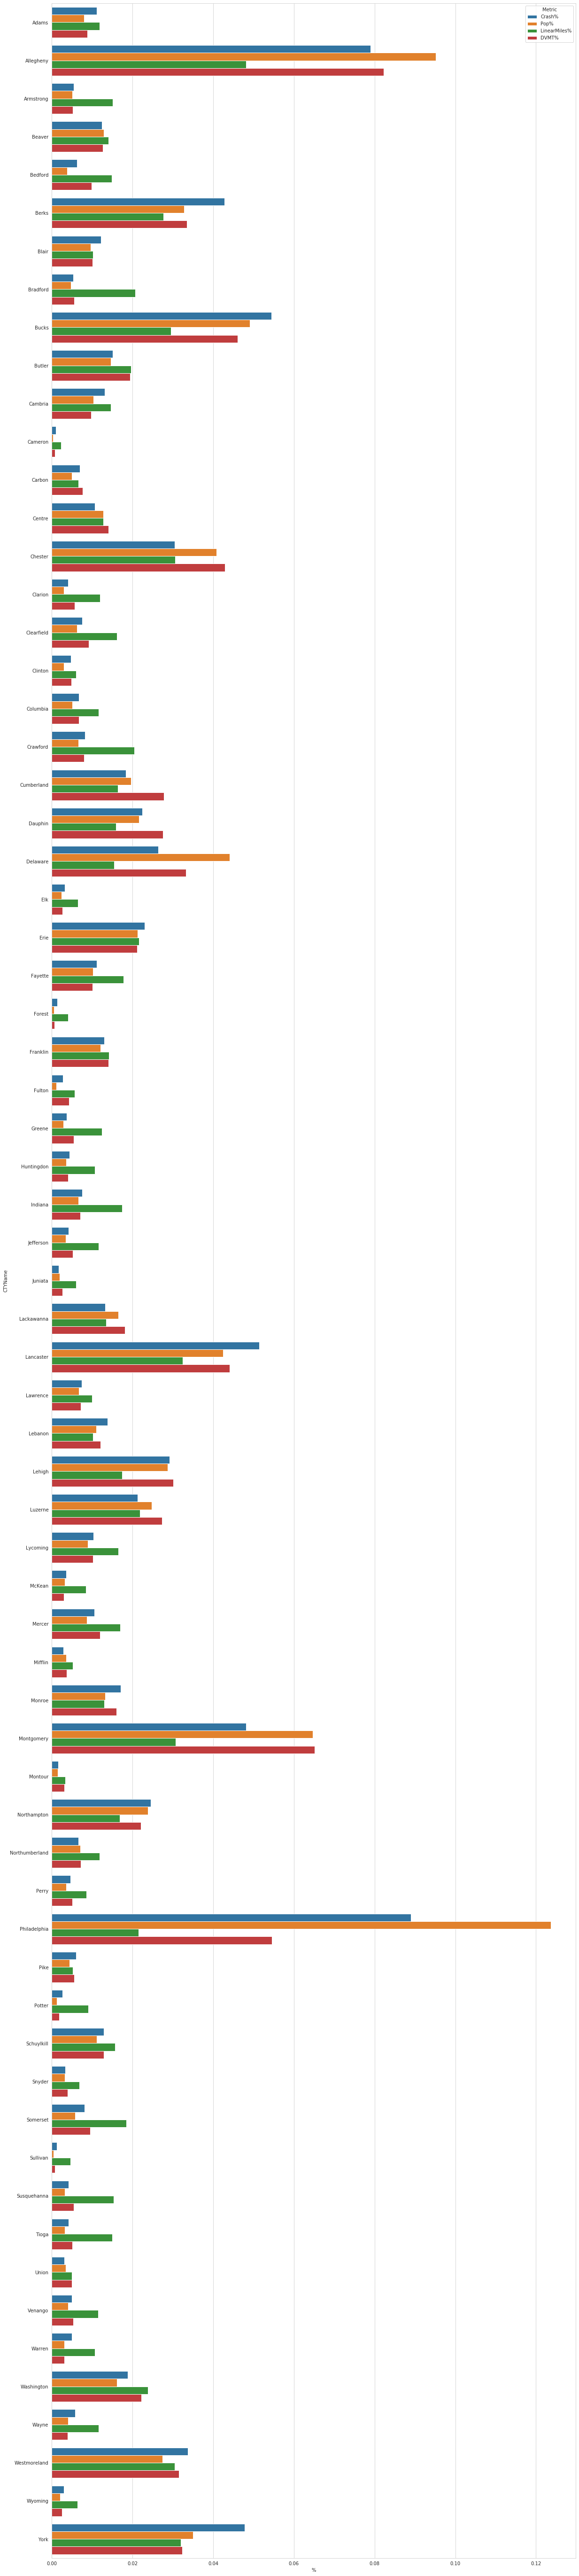

In [129]:
plt.figure(figsize=(20,100))
sns.set_style('whitegrid')
sns.barplot(x='%', y='CTYName', data=county_plot, hue='Metric')
plt.tick_params(labelsize=10)

In [130]:
county_df

,CTYName,CrashCount,Crash%,Pop,Pop%,LinearMiles,LinearMiles%,DVMT,DVMT%
0,Adams,799,0.011148,102811,0.008028,1421.25,0.011785,2471433.0,0.008834
1,Allegheny,5663,0.079009,1218452,0.095139,5802.01,0.048111,23008047.0,0.082240
2,Armstrong,387,0.005399,65263,0.005096,1819.80,0.015090,1469104.0,0.005251
3,Beaver,890,0.012417,164742,0.012863,1689.60,0.014010,3549429.0,0.012687
4,Bedford,449,0.006264,48176,0.003762,1794.07,0.014877,2760036.0,0.009865
...,...,...,...,...,...,...,...,...,...
62,Washington,1351,0.018849,207346,0.016190,2879.06,0.023873,6201366.0,0.022166
63,Wayne,417,0.005818,51276,0.004004,1405.04,0.011651,1107489.0,0.003959
64,Westmoreland,2420,0.033764,350611,0.027376,3673.44,0.030461,8818384.0,0.031520
65,Wyoming,214,0.002986,27046,0.002112,761.95,0.006318,713650.0,0.002551


In [132]:
county_df['Congestion'] = county_df['DVMT'] / county_df['LinearMiles']
county_df['Congestion-Index'] = county_df['Congestion'] / county_df['Congestion'].mean()

In [133]:
county_df

,CTYName,CrashCount,Crash%,Pop,Pop%,LinearMiles,LinearMiles%,DVMT,DVMT%,Congestion,Congestion-Index
0,Adams,799,0.011148,102811,0.008028,1421.25,0.011785,2471433.0,0.008834,1738.915040,0.877871
1,Allegheny,5663,0.079009,1218452,0.095139,5802.01,0.048111,23008047.0,0.082240,3965.530394,2.001952
2,Armstrong,387,0.005399,65263,0.005096,1819.80,0.015090,1469104.0,0.005251,807.288713,0.407550
3,Beaver,890,0.012417,164742,0.012863,1689.60,0.014010,3549429.0,0.012687,2100.751065,1.060540
4,Bedford,449,0.006264,48176,0.003762,1794.07,0.014877,2760036.0,0.009865,1538.421578,0.776654
...,...,...,...,...,...,...,...,...,...,...,...
62,Washington,1351,0.018849,207346,0.016190,2879.06,0.023873,6201366.0,0.022166,2153.955110,1.087399
63,Wayne,417,0.005818,51276,0.004004,1405.04,0.011651,1107489.0,0.003959,788.225958,0.397927
64,Westmoreland,2420,0.033764,350611,0.027376,3673.44,0.030461,8818384.0,0.031520,2400.579294,1.211905
65,Wyoming,214,0.002986,27046,0.002112,761.95,0.006318,713650.0,0.002551,936.610014,0.472837


In [144]:
county_df['DVMTCrash-Index'] = (county_df['DVMT%'] - county_df['Crash%'])/county_df['DVMT%']
county_df['Congestion-Index Formatted'] = county_df['Congestion-Index'].round(2).astype(str)
county_df['CTYName : Congestion-Index'] = county_df['CTYName'] + ' : ' + county_df['Congestion-Index Formatted']
county_df.drop('Congestion-Index Formatted', axis=1, inplace=True)
county_df

,CTYName,CrashCount,Crash%,Pop,Pop%,LinearMiles,LinearMiles%,DVMT,DVMT%,Congestion,Congestion-Index,DVMTCrash-Index,CTYName & Congestion-Index
0,Adams,799,0.011148,102811,0.008028,1421.25,0.011785,2471433.0,0.008834,1738.915040,0.877871,-0.261905,Adams : 0.88
1,Allegheny,5663,0.079009,1218452,0.095139,5802.01,0.048111,23008047.0,0.082240,3965.530394,2.001952,0.039283,Allegheny : 2.0
2,Armstrong,387,0.005399,65263,0.005096,1819.80,0.015090,1469104.0,0.005251,807.288713,0.407550,-0.028223,Armstrong : 0.41
3,Beaver,890,0.012417,164742,0.012863,1689.60,0.014010,3549429.0,0.012687,2100.751065,1.060540,0.021276,Beaver : 1.06
4,Bedford,449,0.006264,48176,0.003762,1794.07,0.014877,2760036.0,0.009865,1538.421578,0.776654,0.365019,Bedford : 0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Washington,1351,0.018849,207346,0.016190,2879.06,0.023873,6201366.0,0.022166,2153.955110,1.087399,0.149652,Washington : 1.09
63,Wayne,417,0.005818,51276,0.004004,1405.04,0.011651,1107489.0,0.003959,788.225958,0.397927,-0.469689,Wayne : 0.4
64,Westmoreland,2420,0.033764,350611,0.027376,3673.44,0.030461,8818384.0,0.031520,2400.579294,1.211905,-0.071162,Westmoreland : 1.21
65,Wyoming,214,0.002986,27046,0.002112,761.95,0.006318,713650.0,0.002551,936.610014,0.472837,-0.170462,Wyoming : 0.47


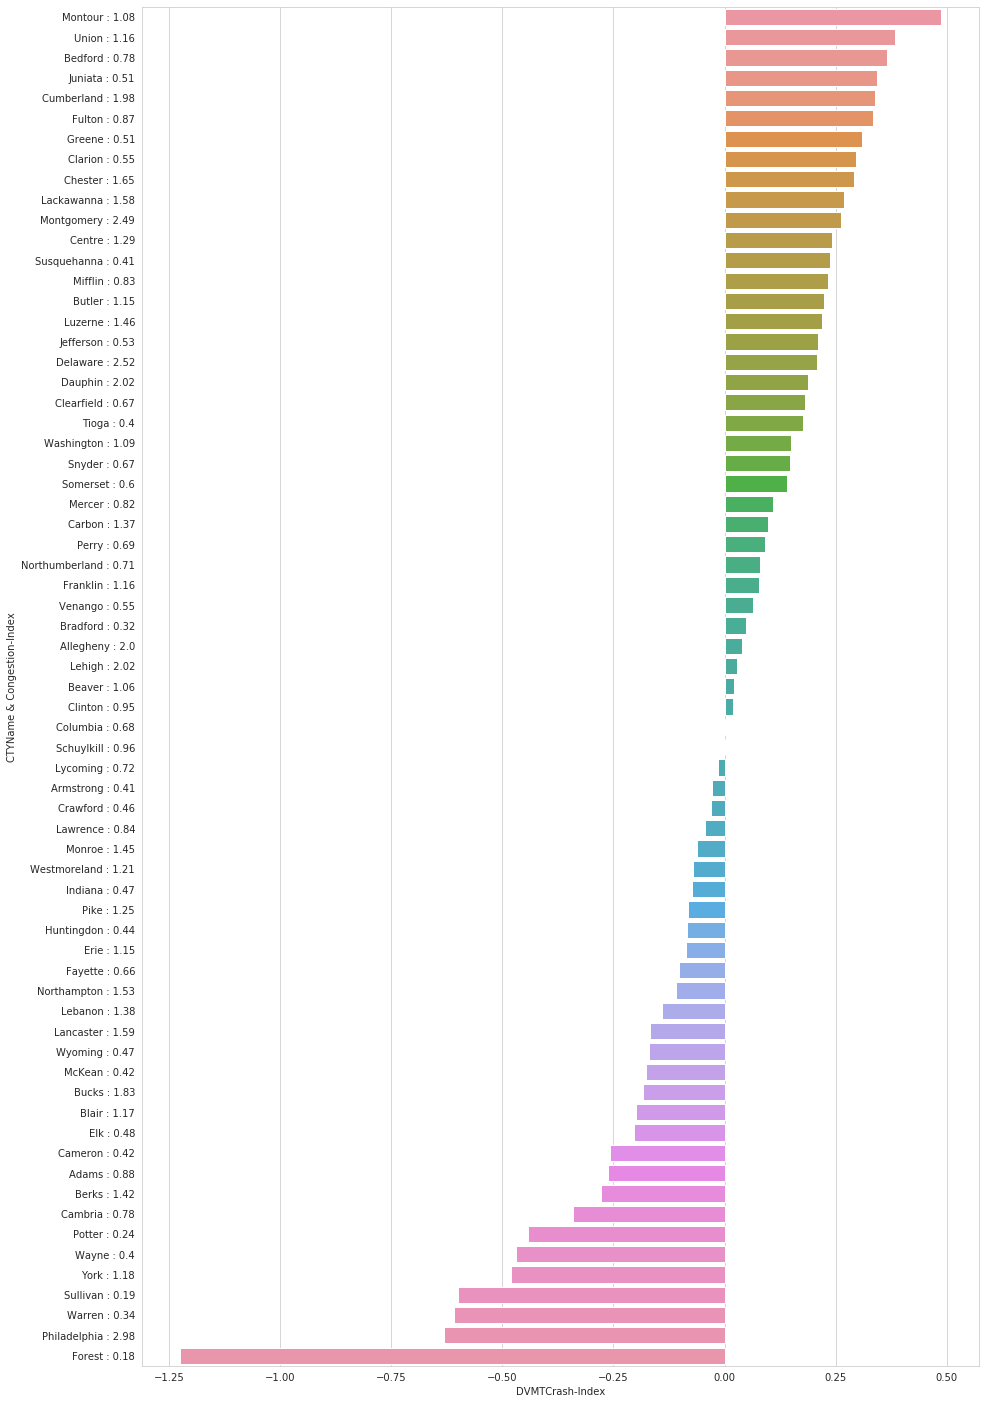

In [145]:
plt.figure(figsize=(15,25))
sns.set_style('whitegrid')
plt.tick_params(labelsize=10)
sns.barplot(x='DVMTCrash-Index', y='CTYName & Congestion-Index', data=county_df.sort_values('DVMTCrash-Index', ascending=False))

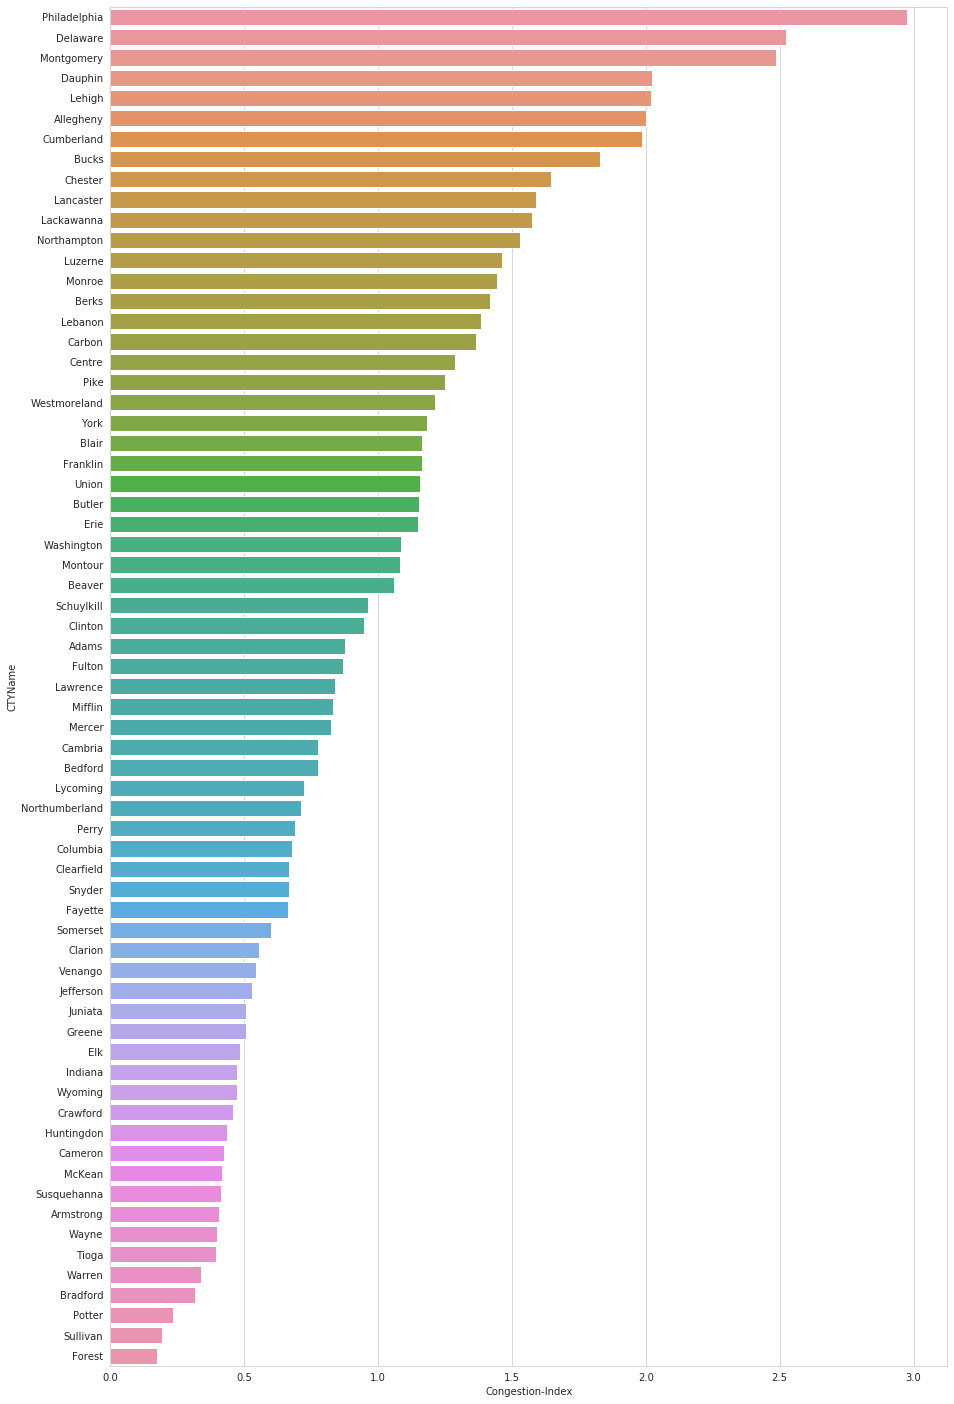

In [137]:
plt.figure(figsize=(15,25))
sns.set_style('whitegrid')
plt.tick_params(labelsize=10)
sns.barplot(x='Congestion-Index', y='CTYName', data=county_df.sort_values('Congestion-Index', ascending=False))